In [293]:
import pandas as pd
import matplotlib.pyplot as plt

In [294]:
df = pd.read_csv('water.csv')
del df['Unnamed: 0']
df

,location,town,mortality,hardness
0,South,Bath,1247,105
1,North,Birkenhead,1668,17
2,South,Birmingham,1466,5
3,North,Blackburn,1800,14
4,North,Blackpool,1609,18
...,...,...,...,...
56,South,Walsall,1527,60
57,South,West Bromwich,1627,53
58,South,West Ham,1486,122
59,South,Wolverhampton,1485,81


<AxesSubplot:xlabel='hardness', ylabel='mortality'>

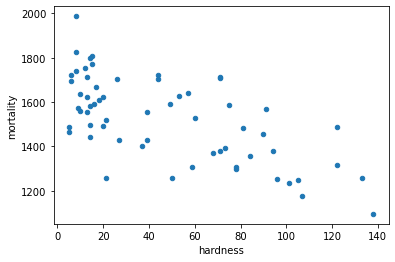

In [295]:
df.plot(kind='scatter', x = 'hardness', y ='mortality')

Визуально видна отрицательная корреляция между смертностью и жесткостью воды. С увеличением жесткости воды смертность постпенно уменьшается. Рассчитаем коэффициенты корреляции.

In [296]:
df[['mortality', 'hardness']].corr()

,mortality,hardness
mortality,1.000000,-0.654849
hardness,-0.654849,1.000000


In [297]:
df[['mortality', 'hardness']].corr(method = 'spearman')

,mortality,hardness
mortality,1.000000,-0.631665
hardness,-0.631665,1.000000


Коэффициенты корреляции Пирсона и Спирмена показывают среднюю отрицательную взаимосвязь между показателями

In [298]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [299]:
X = df[['hardness']]
y = df['mortality']

In [300]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=10)

In [301]:
X_train.shape

(42, 1)

In [302]:
y_train.shape

(42,)

In [303]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [304]:
model.coef_

array([-3.54194341])

In [305]:
model.intercept_

1706.961828324306

In [306]:
y_pred = model.predict(X_test)
y_pred

array([1551.11631814, 1689.25211126, 1650.29073371, 1657.37462054,
       1653.83267712, 1235.88335435, 1632.58101664, 1675.0843376 ,
       1466.10967622, 1678.62628102, 1660.91656395, 1327.97388309,
       1568.8260352 , 1575.90992203, 1374.01914747, 1689.25211126,
       1430.69024208, 1657.37462054, 1274.84473189])

In [307]:
model.score(X_test, y_test)

0.23374928387625848

Коэффициент детерминации давольно низкий, модель плохо описывает зависимость данных

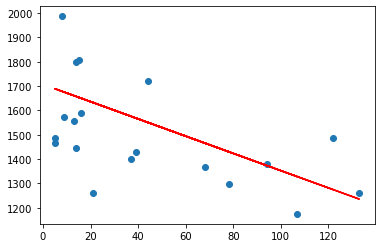

In [308]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='r')

In [309]:
y_pred_all = model.predict(X)
df['pred'] = y_pred_all
df['mortality - pred'] = df['mortality'] - df['pred']

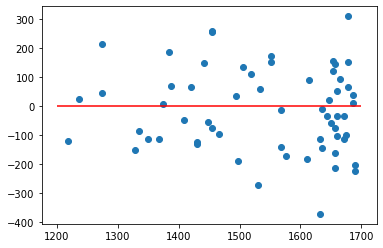

In [310]:
plt.scatter(df['pred'], df['mortality - pred'])
plt.hlines(0, 1200, 1700, color ='r')

Остатки хаотичны, визуально не видно закономерностей

Проверим сохраняется ли аналогичная зависимость для северных и южных городов по отдельности

**South**

In [255]:
df_2 = pd.read_csv('water.csv')
del df_2['Unnamed: 0']

In [311]:
df_s = df_2.loc[df_2['location'] == 'South']
df_s.shape

(26, 4)

<AxesSubplot:xlabel='hardness', ylabel='mortality'>

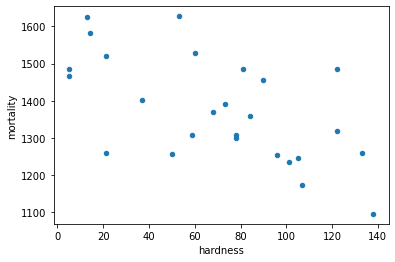

In [349]:
df_s.plot(kind='scatter', x = 'hardness', y ='mortality')

In [313]:
df_s[['mortality', 'hardness']].corr()

,mortality,hardness
mortality,1.000000,-0.602153
hardness,-0.602153,1.000000


In [314]:
df_s[['mortality', 'hardness']].corr(method = 'spearman')

,mortality,hardness
mortality,1.000000,-0.595723
hardness,-0.595723,1.000000


In [315]:
X_s = df_s[['hardness']]
y_s = df_s['mortality']

In [316]:
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_s, y_s, test_size=0.30, random_state=33)

In [317]:
X_train_s.shape

(18, 1)

In [318]:
y_train_s.shape

(18,)

In [319]:
model_s = LinearRegression()
model_s.fit(X_train_s, y_train_s)

LinearRegression()

In [320]:
y_pred_s = model_s.predict(X_test_s)
y_pred_s

array([1438.35684991, 1366.24908481, 1294.1413197 , 1426.08318776,
       1346.30438382, 1401.53586347, 1376.98853918, 1271.12820318])

In [321]:
model.score(X_test_s, y_test_s)

0.5006683151585121

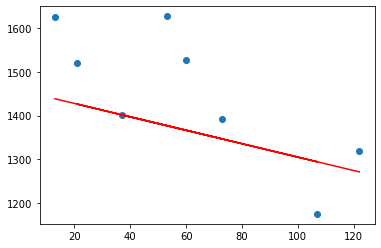

In [322]:
plt.scatter(X_test_s, y_test_s)
plt.plot(X_test_s, y_pred_s, c='r')

In [325]:
y_pred_all_s = model_s.predict(X_s)
df_s['pred'] = y_pred_all_s
df_s['mortality - pred'] = df_s['mortality'] - df_s['pred']

<ipython-input-325-e3d913ec88e1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_s['pred'] = y_pred_all_s
<ipython-input-325-e3d913ec88e1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_s['mortality - pred'] = df_s['mortality'] - df_s['pred']


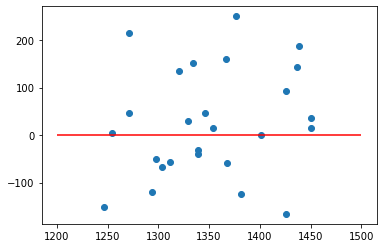

In [328]:
plt.scatter(df_s['pred'], df_s['mortality - pred'])
plt.hlines(0, 1200, 1500, color ='r')

**North**

In [329]:
df_n = df_2.loc[df_2['location'] == 'North']
df_n.shape

(35, 4)

<AxesSubplot:xlabel='hardness', ylabel='mortality'>

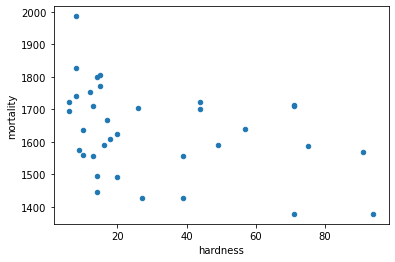

In [330]:
df_n.plot(kind='scatter', x = 'hardness', y ='mortality')

In [331]:
df_n[['mortality', 'hardness']].corr()

,mortality,hardness
mortality,1.000000,-0.368598
hardness,-0.368598,1.000000


In [332]:
df_n[['mortality', 'hardness']].corr(method = 'spearman')

,mortality,hardness
mortality,1.000000,-0.404208
hardness,-0.404208,1.000000


In [333]:
X_n = df_n[['hardness']]
y_n = df_n['mortality']

In [334]:
X_train_n, X_test_n, y_train_n, y_test_n = train_test_split(X_n, y_n, test_size=0.30, random_state=30)

In [336]:
X_train_n.shape

(24, 1)

In [337]:
y_train_n.shape

(24,)

In [338]:
model_n = LinearRegression()
model_n.fit(X_train_n, y_train_n)

LinearRegression()

In [339]:
y_pred_n = model_n.predict(X_test_n)
y_pred_n

array([1652.44746579, 1663.15576222, 1523.9479087 , 1626.74755437,
       1601.04764295, 1590.33934653, 1667.43908079, 1654.58912508,
       1532.51454584, 1652.44746579, 1579.6310501 ])

In [340]:
model.score(X_test_n, y_test_n)

-0.22875037708124624

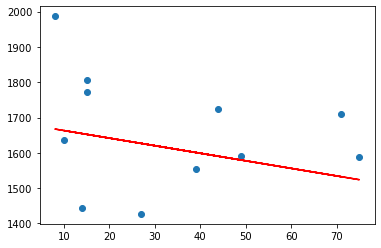

In [341]:
plt.scatter(X_test_n, y_test_n)
plt.plot(X_test_n, y_pred_n, c='r')

In [342]:
y_pred_all_n = model_n.predict(X_n)
df_n['pred'] = y_pred_all_n
df_n['mortality - pred'] = df_n['mortality'] - df_n['pred']

<ipython-input-342-2302c2105d67>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_n['pred'] = y_pred_all_n
<ipython-input-342-2302c2105d67>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_n['mortality - pred'] = df_n['mortality'] - df_n['pred']


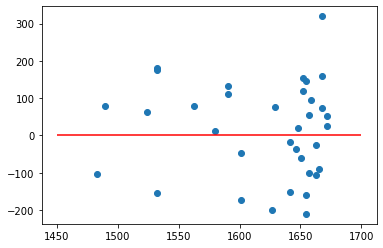

In [347]:
plt.scatter(df_n['pred'], df_n['mortality - pred'])
plt.hlines(0, 1450, 1700, color ='r')

При разделении данных на 2 группы, взаимосвязь между смертностью и жесткостью воды в каждой группе уже визуально не прослеживается. Коэффициенты корреляции, в группе South средний отридцательный, а в группе North уже низкий отридцательный.
Коэффициенты детерминации в группе South оказался даже больше чем по всей совокупности городов, а в группе North получился отридцательным.
На основании имеющихся данных можно сдалать вывод, что линейная взаимосвязь между смертностью и жесткостью воды отсутствует.